# Predicting Car Crash Severity in the United States
### Analysis Completed by Vaibhav Sanjay, Kashish Patel

# Introduction

Car crashes are one of the largest non-illness causes of fatalities among people in the United States. Analysis of car accidents is useful for locating accident-prone regions, analyzing effects of weather, and predicting accidents. We analyze a countrywide dataset of car accidents to understand patterns in car crashes and predict the severity of them based on various parameters such as precipitation, visibility, temperature, and location.

We used the [US Accidents (2016-2021)](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents) dataset on Kaggle for our analysis [[1]](#1). The dataset includes 2.8 million points of accident data from February 2016 to December 2021 and covers 49 states.

<span style="color:#b00c00; font-weight:bold; font-size:larger">TO REMOVE</span>

_Dataset:
https://smoosavi.org/datasets/us_accidents_

Ideas:
- time graph
- ~~state frequency chloropleth~~

# Data Wrangling
This notebook depends on numpy, pandas, matplotlib, plotly, ....

## Reading in the Data
We start by doing the necessary imports and reading in the data. Note that there is a lot of data so this command and several subsequent commands may take some time to complete.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

data_all = pd.read_csv('./US_Accidents_Dec21_updated.csv', nrows=100)
data_all.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


The above dataframe has 47 columns. We will not be using all of these columns. Here are the descriptions for all the columns that we are interested in.
1. ID - .....

## Filtering Columns
We remove the rest of the columns. Here are explanations for why each was removed.
1. The "Description" column is too messy and does not provide much useful information.
2. The "Number", "Street", "Side", "County", "Zipcode", "Timezone", and "Airport_Code" columns all provide location information that is not as specific as latitude, longitude and city. The "Country" column is not useful since this data is for the USA.
3. The "Weather timestamp" column shows the timestamp that weather data is collected. This is not very significant.
4. The "Nautical_Twilight" and "Astronomical_Twilight" columns are different measure for when sunset occurs, which we decided to just use the sunset measure to keep everything consistent.

In [3]:

# get data
to_remove = ["Description", "Number", "Street", "Side", "County","Country", "Zipcode", 
    "Timezone", "Airport_Code", "Weather_Timestamp", "Nautical_Twilight", 
    "Astronomical_Twilight"]

data = data_all.drop(to_remove, axis=1, errors='ignore')

Also, it was reported that there was an error in the end times where the duration of each accident was always exactly 6 hours. Here, we will confirm that this information is correct and up to date.

In [6]:
# convert Start_Time and End_Time to datetime objects
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

# check difference between start and end time
durations = data['End_Time'] - data['Start_Time']
durations.unique()

array([21600000000000], dtype='timedelta64[ns]')

It seems like the report is correct, so we will drop the End_Time column as it does not provide any new (or correct) information.

In [8]:
data = data.drop('End_Time', axis=1, errors='ignore')

## Encoding

In [4]:
# one hot encoding cell
data['Roundabout'] = data['Roundabout'].apply(int)

# Data Exploration

## Graphing Accident Locations
We are given the state acronyms for every accident with the "State" column. Using this data, we create a chloropleth plot for the frequency of car accidents across the United States.

In [59]:
# # Change the value_counts into a DataFrame with each row being a state and its number of accidents
# freqs = data['State'].value_counts().rename_axis('State').reset_index(name='Accidents')
# 
# # Create the figure
# fig = px.choropleth(
#         freqs,
#         locations='State',
#         color='Accidents',
#         locationmode='USA-states',
#         color_continuous_scale='reds',
#         title='Frequency of Car Accidents in the US (2016-2021)',
#         scope='usa'
# )
# 
# # Show figure
# fig.show()

[Intro for time-related plots]

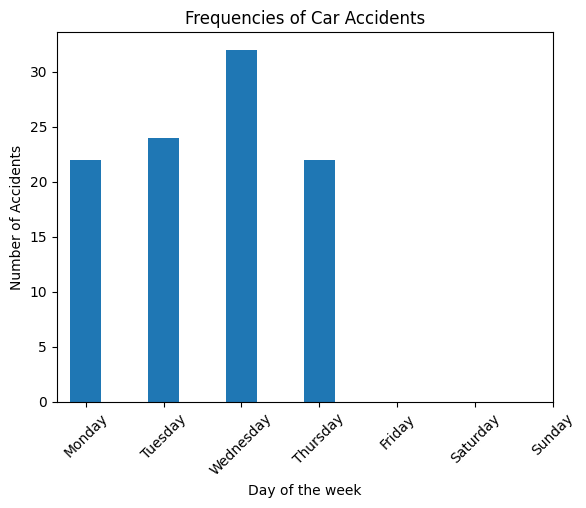

In [57]:
# get the frequencies of car accidents on each day of the week
days_of_week = data['Start_Time'].apply(lambda x: x.dayofweek).value_counts()

# plot the frequencies on a bar graph, with each bar representing a day of the week
plt.bar(x=days_of_week.index, height=days_of_week, width=0.4)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)
plt.title("Frequencies of Car Accidents")
plt.ylabel("Number of Accidents")
plt.xlabel("Day of the week")
plt.show()

[Analysis for after processing all data]

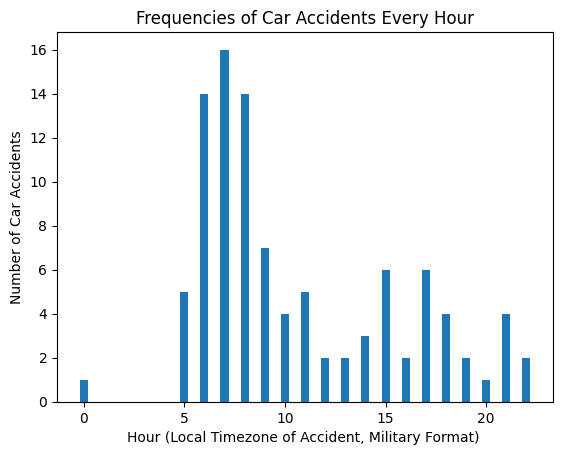

In [56]:
# get the frequencies of car accidents for each hour of the day
hours = data['Start_Time'].apply(lambda x: x.hour).value_counts()

# plot the frequencies on a bar graph, with each bar representing and hour of the day
plt.bar(x=hours.index, height=hours, width=0.4)
plt.title("Frequencies of Car Accidents Every Hour")
plt.xlabel("Hour (Local Timezone of Accident, Military Format) ")
plt.ylabel("Number of Car Accidents")
plt.show()

[Analysis for after processing all data]

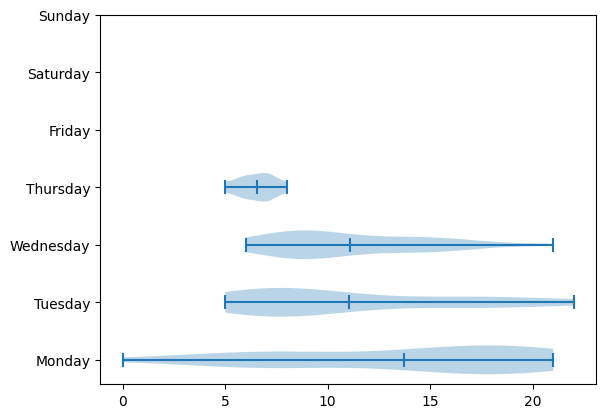

In [99]:
# not sure if this will be useful but ima do it bc why not

data['Day_Of_Week'] = data['Start_Time'].apply(lambda x: x.dayofweek)
data['Hour'] = data['Start_Time'].apply(lambda x: x.hour)
grouped_by_day = data.groupby(by='Day_Of_Week')

hour_foreach_day = grouped_by_day.apply(lambda x: x['Hour'].tolist()).tolist()

fig, ax = plt.subplots()
ax.violinplot(dataset=hour_foreach_day, positions=range(len(hour_foreach_day)), vert=False)

plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

# Citations
- <a id="1">[1]</a> 
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.
- <a id="2">[2]</a> 
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.